In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Importanto os datasets

path_teste = r'C:\Users\T-Gamer\Desktop\Python_Estudo\Curso_analise_de_dados\Titanic\test.csv'
path_treino = r'C:\Users\T-Gamer\Desktop\Python_Estudo\Curso_analise_de_dados\Titanic\train.csv'

teste = pd.read_csv(path_teste)
treino = pd.read_csv(path_treino)

treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Tipos de dados e dados faltantes

treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
# Criando uma nova coluna com sexo binário

def bin(valor):
    if valor == 'female':
        return 1
    else:
        return 0

treino['SexBin'] = treino['Sex'].map(bin)

treino['SexBin'].head()

0    0
1    1
2    1
3    1
4    0
Name: SexBin, dtype: int64

In [6]:
# SUbtituindo os valores nulos referentes a idade por -1

treino['Age'].fillna(-1, inplace=True)

In [7]:
# Selecionando variáveis

var = ['SexBin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

# Definindo o conjunto variáveis e o alvo

X = treino[var]
y = treino['Survived']

# Separando o conjunto  X, y em treino e validação para testar o modelo

np.random.seed(0)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [10]:
# Validação cruzada

resultados = []
resultados2 = []

k = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)

for linhas_treino, linhas_valid in k.split(X):
    
    print('Treino', linhas_treino.shape[0])
    print('Validação', linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    modelo2 = LogisticRegression()

    modelo.fit(X_treino,y_treino)
    modelo2.fit(X_treino,y_treino)

    p = modelo.predict(X_valid)
    p2 = modelo2.predict(X_valid)
    ac = np.mean(y_valid == p)
    ac2 = np.mean(y_valid == p2)
    resultados.append(ac)
    resultados2.append(ac2)

    print(f'Precisão (RF) = {ac}')
    print(f'Precisão (LR) = {ac2}')
    print()

Treino 712
Validação 179
Precisão (RF) = 0.8324022346368715
Precisão (LR) = 0.8044692737430168

Treino 713
Validação 178
Precisão (RF) = 0.7865168539325843
Precisão (LR) = 0.7640449438202247

Treino 713
Validação 178
Precisão (RF) = 0.8202247191011236
Precisão (LR) = 0.7696629213483146

Treino 713
Validação 178
Precisão (RF) = 0.7921348314606742
Precisão (LR) = 0.7921348314606742

Treino 713
Validação 178
Precisão (RF) = 0.8258426966292135
Precisão (LR) = 0.8033707865168539

Treino 712
Validação 179
Precisão (RF) = 0.7821229050279329
Precisão (LR) = 0.7541899441340782

Treino 713
Validação 178
Precisão (RF) = 0.7921348314606742
Precisão (LR) = 0.7808988764044944

Treino 713
Validação 178
Precisão (RF) = 0.8314606741573034
Precisão (LR) = 0.848314606741573

Treino 713
Validação 178
Precisão (RF) = 0.8033707865168539
Precisão (LR) = 0.7696629213483146

Treino 713
Validação 178
Precisão (RF) = 0.8089887640449438
Precisão (LR) = 0.7865168539325843

Treino 712
Validação 179
Precisão (RF) = 

C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (RF) = 0.7821229050279329
Precisão (LR) = 0.776536312849162

Treino 713
Validação 178
Precisão (RF) = 0.8426966292134831
Precisão (LR) = 0.7696629213483146

Treino 713
Validação 178
Precisão (RF) = 0.8426966292134831
Precisão (LR) = 0.797752808988764

Treino 713
Validação 178
Precisão (RF) = 0.8202247191011236
Precisão (LR) = 0.8202247191011236

Treino 713
Validação 178
Precisão (RF) = 0.7865168539325843
Precisão (LR) = 0.7584269662921348

Treino 712
Validação 179
Precisão (RF) = 0.8268156424581006
Precisão (LR) = 0.776536312849162

Treino 713
Validação 178
Precisão (RF) = 0.7921348314606742
Precisão (LR) = 0.7921348314606742

Treino 713
Validação 178
Precisão (RF) = 0.8202247191011236
Precisão (LR) = 0.7865168539325843

Treino 713
Validação 178
Precisão (RF) = 0.8202247191011236
Precisão (LR) = 0.8089887640449438

Treino 713
Validação 178
Precisão (RF) = 0.7865168539325843
Precisão (LR) = 0.7752808988764045

Treino 712
Validação 179
Precisão (RF) = 0.8212290502793296
Precisão

In [11]:
# Média dos resultados do modelo com validação cruzada:

np.mean(resultados), np.mean(resultados2)

(0.8078463373297347, 0.786523131002448)

((array([ 1.,  0.,  2.,  3., 12.,  6.,  3., 10.,  8.,  5.]),
  array([0.73595506, 0.74727575, 0.75859645, 0.76991714, 0.78123784,
         0.79255853, 0.80387923, 0.81519992, 0.82652062, 0.83784132,
         0.84916201]),
  <BarContainer object of 10 artists>),
 (array([ 1.,  0.,  0.,  3., 12., 11.,  9.,  7.,  6.,  1.]),
  array([0.69662921, 0.71179775, 0.72696629, 0.74213483, 0.75730337,
         0.77247191, 0.78764045, 0.80280899, 0.81797753, 0.83314607,
         0.84831461]),
  <BarContainer object of 10 artists>))

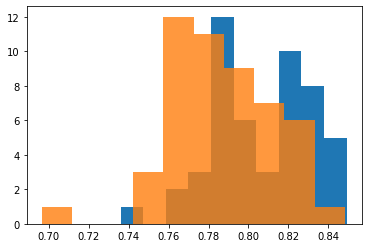

In [24]:
# Visualizando a distribuição de precisões

plt.hist(resultados), plt.hist(resultados2, alpha=0.8)

# Modelo 1 em azul, modelo 2 em laranja


In [26]:
# Com o intuito de optimizar os modelos, vamos verificar a influência de novas features

treino.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [27]:
# As informações referentes a "Embarked", "Cabin" e o título presente em "Name" podem conter informações que ajudem o modelo a ter uma maior precisão

treino['Embarked_C'] = (treino['Embarked'] == 'C').astype(int)
treino['Embarked_S'] = (treino['Embarked'] == 'S').astype(int)

treino['Cabin_null'] = (treino['Cabin'].isnull()).astype(int)

treino['Name_Mrs'] = treino['Name'].str.contains('Mrs').astype(int)
treino['Name_Master'] = treino['Name'].str.contains('Master').astype(int)
treino['Name_Mr'] = treino['Name'].str.contains('Mr').astype(int)
treino['Name_Miss'] = treino['Name'].str.contains('Miss').astype(int)

In [38]:
# Introduzindo as novas features e reproduzindo o modelo para verificar a precisão

nvar = ['Embarked_C', 'Embarked_S', 'Cabin_null', 'Name_Mrs', 'Name_Master', 'Name_Mr', 'Name_Miss']
var2 = ['SexBin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_S', 'Cabin_null', 'Name_Mrs', 'Name_Master', 'Name_Mr', 'Name_Miss']

X = treino[var2].fillna(-1)
y = treino['Survived']

np.random.seed(0)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [39]:
resultados = []
resultados2 = []

k = RepeatedKFold(n_splits=5, n_repeats=10, random_state=0)

for linhas_treino, linhas_valid in k.split(X):
    
    print('Treino', linhas_treino.shape[0])
    print('Validação', linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    modelo2 = LogisticRegression()

    modelo.fit(X_treino,y_treino)
    modelo2.fit(X_treino,y_treino)

    p = modelo.predict(X_valid)
    p2 = modelo2.predict(X_valid)
    ac = np.mean(y_valid == p)
    ac2 = np.mean(y_valid == p2)
    resultados.append(ac)
    resultados2.append(ac2)

    print(f'Precisão (RF) = {ac}')
    print(f'Precisão (LR) = {ac2}')
    print()

Treino 712
Validação 179


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (RF) = 0.8212290502793296
Precisão (LR) = 0.8268156424581006

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.797752808988764
Precisão (LR) = 0.8089887640449438

Treino 713
Validação 178
Precisão (RF) = 0.8314606741573034
Precisão (LR) = 0.8033707865168539

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8033707865168539
Precisão (LR) = 0.8426966292134831

Treino 713
Validação 178
Precisão (RF) = 0.8033707865168539
Precisão (LR) = 0.8314606741573034

Treino 712
Validação 179


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.7374301675977654
Precisão (LR) = 0.7821229050279329

Treino 713
Validação 178
Precisão (RF) = 0.7808988764044944
Precisão (LR) = 0.8202247191011236

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8370786516853933
Precisão (LR) = 0.9044943820224719

Treino 713
Validação 178
Precisão (RF) = 0.8146067415730337
Precisão (LR) = 0.8089887640449438

Treino 713
Validação 178
Precisão (RF) = 0.8089887640449438
Precisão (LR) = 0.8258426966292135

Treino 712
Validação 179


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.7877094972067039
Precisão (LR) = 0.8156424581005587

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8258426966292135
Precisão (LR) = 0.848314606741573

Treino 713
Validação 178
Precisão (RF) = 0.7808988764044944
Precisão (LR) = 0.8033707865168539

Treino 713
Validação 178
Precisão (RF) = 0.8033707865168539
Precisão (LR) = 0.8202247191011236

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8033707865168539
Precisão (LR) = 0.8089887640449438

Treino 712
Validação 179
Precisão (RF) = 0.7821229050279329
Precisão (LR) = 0.7988826815642458

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8314606741573034
Precisão (LR) = 0.8314606741573034

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8258426966292135
Precisão (LR) = 0.848314606741573

Treino 713
Validação 178
Precisão (RF) = 0.8146067415730337
Precisão (LR) = 0.8202247191011236

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8089887640449438
Precisão (LR) = 0.8089887640449438

Treino 712
Validação 179
Precisão (RF) = 0.8156424581005587
Precisão (LR) = 0.8268156424581006

Treino 713
Validação 178
Precisão (RF) = 0.7808988764044944
Precisão (LR) = 0.8202247191011236

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8202247191011236
Precisão (LR) = 0.8370786516853933

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8539325842696629
Precisão (LR) = 0.8314606741573034

Treino 713
Validação 178
Precisão (RF) = 0.7865168539325843
Precisão (LR) = 0.8089887640449438

Treino 712
Validação 179


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (RF) = 0.8268156424581006
Precisão (LR) = 0.8268156424581006

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.7752808988764045
Precisão (LR) = 0.8033707865168539

Treino 713
Validação 178
Precisão (RF) = 0.8370786516853933
Precisão (LR) = 0.8539325842696629

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8146067415730337
Precisão (LR) = 0.848314606741573

Treino 713
Validação 178
Precisão (RF) = 0.7696629213483146
Precisão (LR) = 0.7921348314606742

Treino 712
Validação 179


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8324022346368715
Precisão (LR) = 0.8324022346368715

Treino 713
Validação 178
Precisão (RF) = 0.7921348314606742
Precisão (LR) = 0.7808988764044944

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8314606741573034
Precisão (LR) = 0.848314606741573

Treino 713
Validação 178
Precisão (RF) = 0.797752808988764
Precisão (LR) = 0.8202247191011236

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8089887640449438
Precisão (LR) = 0.8539325842696629

Treino 712
Validação 179
Precisão (RF) = 0.8435754189944135
Precisão (LR) = 0.8491620111731844

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.7584269662921348
Precisão (LR) = 0.7471910112359551

Treino 713
Validação 178
Precisão (RF) = 0.8146067415730337
Precisão (LR) = 0.8258426966292135

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8202247191011236
Precisão (LR) = 0.848314606741573

Treino 713
Validação 178
Precisão (RF) = 0.8089887640449438
Precisão (LR) = 0.8314606741573034

Treino 712
Validação 179


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8379888268156425
Precisão (LR) = 0.8603351955307262

Treino 713
Validação 178
Precisão (RF) = 0.8202247191011236
Precisão (LR) = 0.8146067415730337

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.8089887640449438
Precisão (LR) = 0.8033707865168539

Treino 713
Validação 178
Precisão (RF) = 0.797752808988764
Precisão (LR) = 0.8595505617977528

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (RF) = 0.7808988764044944
Precisão (LR) = 0.7865168539325843

Treino 712
Validação 179


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (RF) = 0.8491620111731844
Precisão (LR) = 0.8603351955307262

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (RF) = 0.797752808988764
Precisão (LR) = 0.7921348314606742

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisão (RF) = 0.8033707865168539
Precisão (LR) = 0.8258426966292135

Treino 713
Validação 178


C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Precisão (RF) = 0.7808988764044944
Precisão (LR) = 0.7865168539325843

Treino 713
Validação 178
Precisão (RF) = 0.8202247191011236
Precisão (LR) = 0.8370786516853933



In [47]:
np.mean(resultados), np.mean(resultados2)

(0.807737744021091, 0.8234517607180969)

((array([ 1.,  1.,  1.,  7.,  3.,  9., 10.,  8.,  7.,  3.]),
  array([0.73743017, 0.74908041, 0.76073065, 0.77238089, 0.78403113,
         0.79568138, 0.80733162, 0.81898186, 0.8306321 , 0.84228234,
         0.85393258]),
  <BarContainer object of 10 artists>),
 (array([ 1.,  0.,  6., 10.,  7., 13.,  9.,  3.,  0.,  1.]),
  array([0.74719101, 0.76292135, 0.77865169, 0.79438202, 0.81011236,
         0.8258427 , 0.84157303, 0.85730337, 0.87303371, 0.88876404,
         0.90449438]),
  <BarContainer object of 10 artists>))

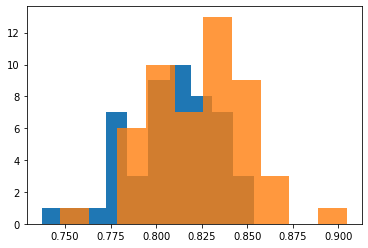

In [41]:
plt.hist(resultados), plt.hist(resultados2, alpha=0.8)

In [ ]:
# Concluímos que, além do aumento da precisão de ambos modelos, o modelo2 (Regressão logística)
#  é mais adequado para o nosso conjunto de dados.

In [45]:
# Agora com o modelo optimizado e validado, aplicamos o modelo sob todos os dados

modelo2 = LogisticRegression()
modelo2.fit(X,y)

#Preparando os dados de teste

teste['SexBin'] = teste['Sex'].map(bin)
teste['Embarked_C'] = (teste['Embarked'] == 'C').astype(int)
teste['Embarked_S'] = (teste['Embarked'] == 'S').astype(int)

teste['Cabin_null'] = (teste['Cabin'].isnull()).astype(int)

teste['Name_Mrs'] = teste['Name'].str.contains('Mrs').astype(int)
teste['Name_Master'] = teste['Name'].str.contains('Master').astype(int)
teste['Name_Mr'] = teste['Name'].str.contains('Mr').astype(int)
teste['Name_Miss'] = teste['Name'].str.contains('Miss').astype(int)

C:\Users\T-Gamer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
p = modelo2.predict(teste[var2].fillna(-1))

# Previsões

p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
# Por fim armazenamos o resultado em um arquivo .csv

prev = pd.Series(p, index=teste['PassengerId'], name='Survived')
prev.to_csv('ModeloLR_Titanic', header=True)